<a href="https://colab.research.google.com/github/PradeC123/Numerical-Solution-to-PDE-GD-Smith-/blob/main/chapter2_pde_fdm_convergence_stability_gd_smith_pranav_chopde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Chapter 2: PDE FDM, Convergence, Stability

## Actual Solution

Given $\alpha = 1$ for simplicity, the exact solution of the heat equation can vary depending on the initial and boundary conditions applied. A common scenario for an analytical solution involves a rod (or a one-dimensional domain) with homogeneous boundary conditions (e.g., the temperature at both ends of the rod is kept constant over time) and an initial temperature distribution.

Assuming:
- The rod extends from $x=0$ to $x=L$,
- Homogeneous Dirichlet boundary conditions, meaning $u(0,t) = 0$ and $u(L,t) = 0$ for all $t > 0$,
- An initial temperature distribution given by $u(x,0) = f(x)$,

the solution can be expressed as a series expansion using the method of separation of variables. For a simple initial condition like $f(x) = \sin\left(\frac{\pi x}{L}\right)$, which satisfies the boundary conditions at $x=0$ and $x=L$, the exact solution of the heat equation is:

$$ u(x,t) = \sum_{n=1}^{\infty} B_n \sin\left(\frac{n \pi x}{L}\right) e^{-n^2 \pi^2 \alpha t / L^2} $$

where $B_n$ are coefficients determined by the initial conditions. For the given initial condition $f(x) = \sin\left(\frac{\pi x}{L}\right)$, only the first term in the series is non-zero ($n=1$), and thus the solution simplifies to:

$$ u(x,t) = \sin\left(\frac{\pi x}{L}\right) e^{-\pi^2 \alpha t / L^2} $$

Given $\alpha = 1$, the exact solution for this specific initial condition is:

$$ u(x,t) = \sin\left(\frac{\pi x}{L}\right) e^{-\pi^2 t / L^2} $$

This solution describes how the temperature distribution evolves over time from the initial sinusoidal distribution, with the amplitude of the temperature wave decaying exponentially due to heat diffusion.


## Finite Difference Method (Explicit Method)

The heat equation in one dimension can be expressed as:

$$
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}
$$

where $u(x,t)$ represents the temperature at position $x$ and time $t$, and $\alpha$ denotes the thermal diffusivity of the material.

The explicit Finite Difference Method (FDM) approximates the spatial domain into a grid with spacing $dx$, and the time is discretized with spacing $dt$. The second spatial derivative in the heat equation can be approximated using a central difference formula:

$$
\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{dx^2}
$$

Similarly, the time derivative can be approximated using a forward difference formula:

$$
\frac{\partial u}{\partial t} \approx \frac{u_{i,j+1} - u_{i,j}}{dt}
$$

By substituting these approximations into the heat equation and solving for $u_{i,j+1}$, we obtain the formula for the future temperature value based on the current and neighboring spatial points at the current time step:

$$
u_{i,j+1} = r u_{i+1,j} + (1 - 2 r)u_{i,j} + r u_{i-1,j}
$$
where $r = \frac{dt}{(dx)^2}$.

This equation allows us to compute the temperature at the next time step $(j+1)$ from the current and neighboring points at the current time step $(j)$.


# Crank Nicolson Method

The Crank-Nicolson method is used for numerically solving the heat equation, which is given by:

$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2},
$$

where $U$ is the temperature, $\alpha$ is the thermal diffusivity, $t$ is the time, and $x$ is the spatial dimension.

To discretize the heat equation using the Crank-Nicolson method, we average the time derivative between time levels $j$ and $j+1$ and the second spatial derivative at the mid-point between these levels. This results in the equation:

$$
\frac{u_{i,j+1} - u_{i,j}}{\Delta t} = \frac{\alpha}{2} \left( \frac{u_{i-1,j+1} - 2u_{i,j+1} + u_{i+1,j+1}}{\Delta x^2} + \frac{u_{i-1,j} - 2u_{i,j} + u_{i+1,j}}{\Delta x^2} \right),
$$

where $\Delta t$ is the time step and $\Delta x$ is the spatial step.

Rearranging the terms to solve for $u_{i,j+1}$, we get a system of linear equations:

$$
- ru_{i-1,j+1} + (2+2r)u_{i,j+1} - ru_{i+1,j+1} = ru_{i-1,j} + (2-2r)u_{i,j} + ru_{i+1,j},
$$

where $r = \frac{\alpha \Delta t}{2 \Delta x^2}$. This system can be solved using standard linear algebra techniques to get the temperature distribution at the next time step.


In [162]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Creating a meshgrid
def create_mesh(r, dx, L, T, alpha = 1):
  # Calculate dx from r, dx, and alpha
  dt = r*(dx)**2

  # Calculate the number of spatial points (nx) and temporal points (nt)
  nx = int(L / dx) + 1
  nt = int(T / dt) + 1

  # Create spatial and temporal domains
  x = np.linspace(0, L, nx)
  t = np.linspace(0, T, nt)
  return x, t, dx, nx, nt


def actual_solution(r, dx, L, T, alpha=1):
  # Use the mesh creation function to define the spatial and temporal domain
  x, t, dx, nx, nt = create_mesh(r=r, dx=dx, L=L, T=T, alpha=alpha)

  # Calculate the solution on the mesh grid
  X, T = np.meshgrid(x, t)
  U = np.sin(X) * np.exp(-np.pi**2 * T / L**2)
  return U, X, T

def FDM_explicit_solution(r, dx, L, T, initial_condition_array, alpha=1):
    # Use the mesh creation function to define the spatial and temporal domain
    x, t, dx, nx, nt = create_mesh(r=r, dx=dx, L=L, T=T, alpha=alpha)
    return U, X, T

    # Initialize the solution matrix with the given initial condition
    U_fdm_exp = np.zeros((nt, nx))
    U_fdm_exp[0, :] = initial_condition_array  # Use the input array directly

    # FDM explicit solution computation
    for j in range(0, nt - 1):
        for i in range(1, nx - 1):
            U_fdm_exp[j + 1, i] = r * U_fdm_exp[j, i + 1] + (1 - 2 * r) * U_fdm_exp[j, i] + r * U_fdm_exp[j, i - 1]

    X, T = np.meshgrid(x, t)
    return U_fdm_exp, X, T

def Crank_Nicolson_solution(r, dx, L, T, initial_condition_array, alpha = 1):
  # Use the mesh creation function to define the spatial and temporal domain
    x, t, dx, nx, nt = create_mesh(r=r, dx=dx, L=L, T=T, alpha=alpha)

    # Initialize the solution matrix with the given initial condition
    U_cn_imp = np.zeros((nt, nx))
    U_cn_imp[0, :] = initial_condition_array  # Use the input array directly




def ErrorAnalysis_Actual_FDMExp_specific_point(r_values, dx, L, T, alpha, x_point, t_point, verbose = 0):
    errors = []
    computational_time = []

    if verbose not in [0, 1]:
        raise ValueError("Verbose must be 0 or 1.")

    for r in r_values:
      x, t, dx, nx, nt = create_mesh(r, dx, L, T, alpha)

      if verbose == 1:
            print("The mesh size at r={} is {}".format(r, (nt, nx)))

      # Index of the closest x to x_point and Index of the closest t to t_point
      x_idx = np.argmin(np.abs(x - x_point))
      t_idx = np.argmin(np.abs(t - t_point))
      start_time = time.time()
      U_fdm_exp, X, T_mesh = FDM_explicit_solution(r, dx, L, T, alpha)
      end_time = time.time()
      U_actual,_,_  = actual_solution(r, dx, L, T, alpha)

      # Compute error at the specific point
      specific_error = np.abs(U_actual[t_idx, x_idx] - U_fdm_exp[t_idx, x_idx])
      errors.append(specific_error)

      computational_time.append(end_time - start_time)

    return errors, computational_time


In [110]:
def plot_FDM_explicit_solution(X, T, U_fdm_exp):
  #Plot the FDM solution
  plt.figure(figsize = (8,6))
  plt.pcolormesh(X,T, U_fdm_exp, shading = 'auto')
  plt.colorbar(label = 'temperature')
  plt.xlabel('Position, $x$')
  plt.ylabel('Time, $t$')
  plt.title('Heat Distribution over Time (FDM Explicit Solution)')
  plt.show()

def plot_actual_solution(U_actual, X, T):
  #Plot the FDM solution
  plt.figure(figsize = (8,6))
  plt.pcolormesh(X,T, U_actual, shading = 'auto')
  plt.colorbar(label = 'temperature')
  plt.xlabel('Position, $x$')
  plt.ylabel('Time, $t$')
  plt.title('Heat Distribution over Time (Actual Solution)')
  plt.show()

def plot_Error_comptime(errors, computational_time, r_values):
  plt.figure(figsize = (12,5))

  # Plot Error as a function of r
  plt.subplot(1,2,1)
  plt.plot(r_values, errors, marker = 'o')
  plt.xlabel('$r$')
  plt.ylabel('Error at point ($x$, $t$)')
  plt.title('Error vs $r$')

  #Plot computation time as a function of r
  plt.subplot(1, 2, 2)
  plt.plot(r_values, computational_time, marker = '+', color = 'red')
  plt.xlabel('$r$')
  plt.ylabel('Computation Time (s)')
  plt.title('Computation Time vs $r$')

  plt.grid
  plt.tight_layout()
  plt.show()

In [ ]:
## Example usage
U, X, T = actual_solution(r=0.1, dx=0.03, L=np.pi, T=1, alpha=1)
plot_actual_solution(U, X, T)

In [ ]:
U_fdm_exp, X, T = FDM_explicit_solution(r=0.1, dx= 0.03, L=np.pi, T=1, alpha=1)
plot_FDM_explicit_solution(X, T, U_fdm_exp)

In [ ]:
# Parameters for demonstration
r_values = np.linspace(0.1, 0.5, 100)  # Example range of r values
dx = 0.02
L = np.pi  # Length of the domain
T = 1  # Total time
alpha = 1  # Thermal diffusivity
x_point = L / 2  # Specific point in space
t_point = T / 2  # Specific point in time
verbose = 1 #(0 or 1 only) (Other than that will raise an error)

# Perform the analysis
errors, computational_time = ErrorAnalysis_Actual_FDMExp_specific_point(r_values, dx, L, T, alpha, x_point, t_point, verbose = 1)

In [ ]:
plot_Error_comptime(errors, computational_time, r_values)

# Exercise (Chapter 1)

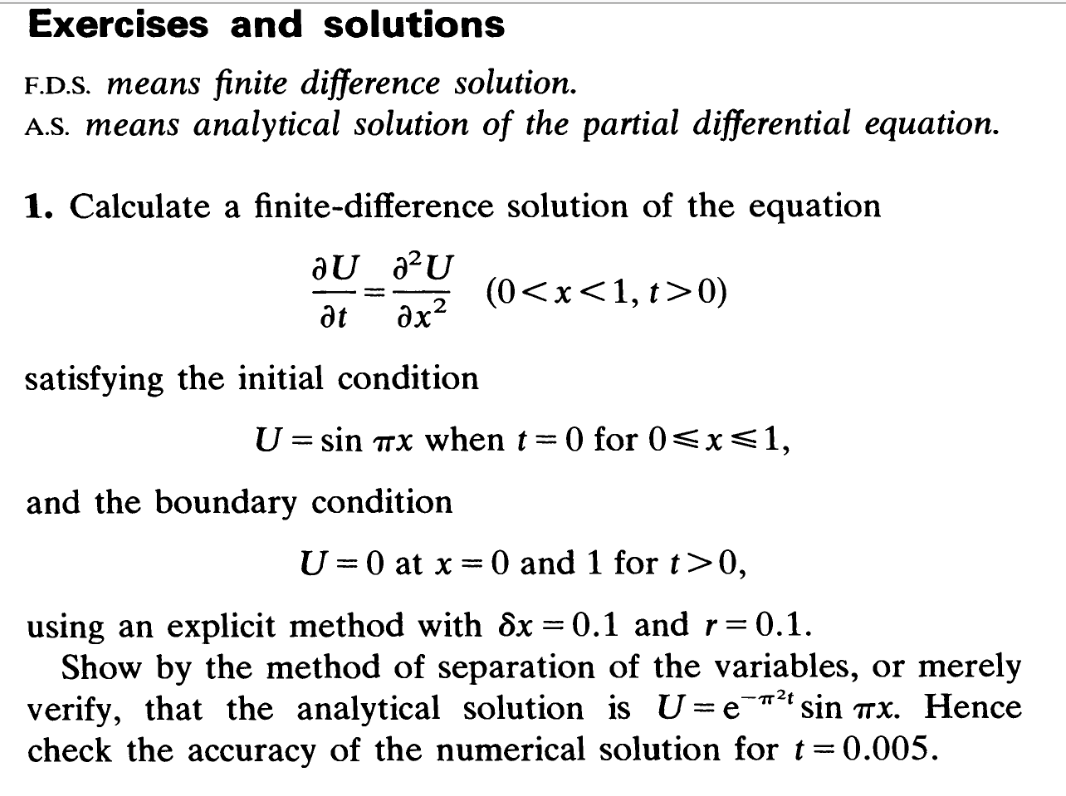

### Question 1

In [111]:
# Mesh
x, t, dx, nx, nt = create_mesh(r = 0.1, dx = 0.05, L = 1, T = 1, alpha = 1)
X_arr, T_arr = np.meshgrid(x, t)

In [116]:
initial_condition_array = np.sin(np.pi * x)  # Ensure consistency in initial condition

#### Question 1 (Actual Solution):

In [117]:
U_actual = np.exp(-1*np.pi**2*T_arr)*np.sin(np.pi*X_arr)

In [ ]:
U_actual.shape

#### Question 1: Finite Method Difference

In [119]:
U_fdm, X, T = FDM_explicit_solution(r=0.1, dx=0.05, L=1, T=1, initial_condition_array=initial_condition_array, alpha=1,)

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(x, U_actual[5, :], linewidth = 3,  label="Analytical Solution")
plt.plot(x, U_fdm[5, :], '-ok', linewidth = 1, label="Explicit Solution")
plt.title("Analytical and Numerical Solution for t = 0.0005")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(x, abs(U_fdm[5,:] - U_actual[5, :]), 'r', linewidth = 1, label = "Error")
plt.title("Actual and FDM(Explcit Solution)")
plt.legend()
plt.grid(True)
plt.show()

### Question 2:

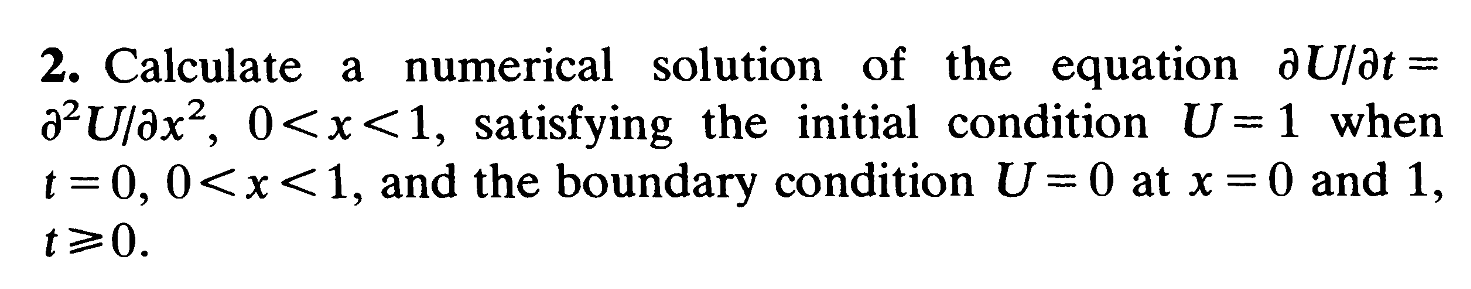

In [127]:
# Mesh
x, t, dx, nx, nt = create_mesh(r = 0.1, dx = 0.05, L = 1, T = 1, alpha = 1)
X_arr, T_arr = np.meshgrid(x, t)

initial_condition_array = np.ones(x.shape)  # Ensure consistency in initial condition

U_fdm, X, T = FDM_explicit_solution(r=0.1, dx=0.05, L=1, T=1, alpha=1, initial_condition_array=initial_condition_array)

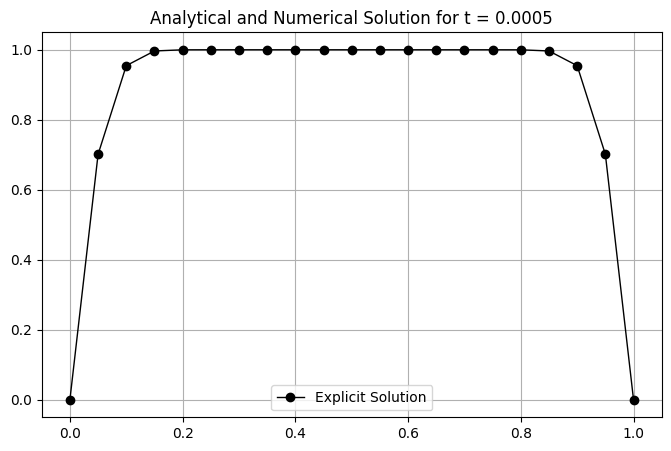

In [128]:
plt.figure(figsize=(8, 5))
plt.plot(x, U_fdm[5, :], '-ok', linewidth = 1, label="Explicit Solution")
plt.title("Analytical and Numerical Solution for t = 0.0005")
plt.legend()
plt.grid(True)
plt.show()

#### Analytical Method:

The one-dimensional heat equation given is:

$$
U_t = \alpha U_{xx},
$$

where $0 < x < 1$ and $t > 0$, with boundary conditions $U(0, t) = 0$ and $U(1, t) = 0$, and the initial condition $U(x, 0) = 1$ for $0 < x < 1$.

We use separation of variables, assuming $U(x, t) = X(x)T(t)$, which leads to:

$$
\frac{T'(t)}{\alpha T(t)} = \frac{X''(x)}{X(x)} = -\lambda,
$$

yielding two ordinary differential equations:

$$
T'(t) + \alpha \lambda T(t) = 0, \quad X''(x) + \lambda X(x) = 0.
$$

For non-trivial solutions under the boundary conditions $X(0) = 0$ and $X(1) = 0$, we find that $\lambda = n^2\pi^2$ and $X_n(x) = \sin(n\pi x)$. The temporal part solves to $T_n(t) = e^{-\alpha n^2 \pi^2 t}$.

The series solution is:

$$
U(x, t) = \sum_{n=1}^{\infty} B_n \sin(n\pi x) e^{-\alpha n^2 \pi^2 t},
$$

where $B_n$ coefficients are determined from the initial condition by:

$$
B_n = 2 \int_0^1 \sin(n\pi x) dx =
\begin{cases}
  \frac{4}{n\pi} & \text{for odd } n, \\
  0 & \text{for even } n.
\end{cases}
$$

Finally, the analytical solution for the given problem is:

$$
U(x, t) = \sum_{\substack{n=1 \\ n \, \text{odd}}}^{\infty} \frac{4}{n\pi} \sin(n\pi x) e^{-\alpha n^2 \pi^2 t}.
$$

or otherwise,

$$
U(x, t) = \sum_{\substack{n=0}}^{\infty} \frac{4}{(2n+1)\pi} \sin((2n+1)\pi x) e^{-\alpha (2n+1)^2 \pi^2 t}.
$$


In [156]:
U_actual = np.zeros((nt,nx))
N_threshold = 100
for n in range(0,N_threshold):
  U_actual += (4/np.pi) * (1/(2*n + 1)) * np.sin((2*n+1) * np.pi * X_arr) * np.exp(-((2*n+1) * np.pi)**2 * alpha * T_arr)

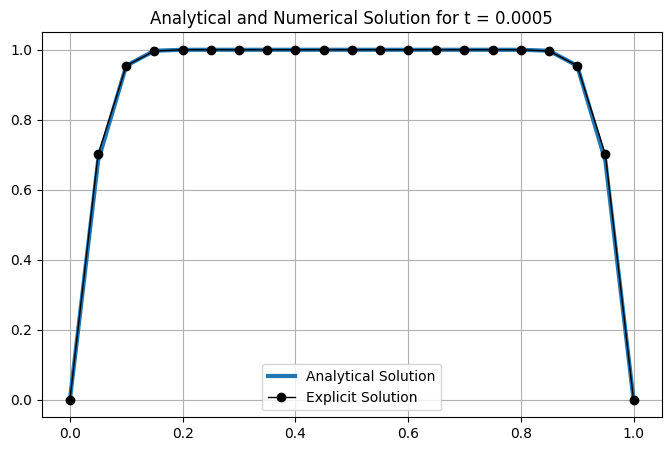

In [157]:
plt.figure(figsize=(8, 5))
plt.plot(x, U_actual[5, :], linewidth = 3,  label="Analytical Solution")
plt.plot(x, U_fdm[5, :], '-ok', linewidth = 1, label="Explicit Solution")
plt.title("Analytical and Numerical Solution for t = 0.0005")
plt.legend()
plt.grid(True)
plt.show()

### Questions 3 (Crank Nicolson Version)